In [1]:
import pandas as pd

In [8]:
df = pd.read_csv("~/downloads/metaverse_transactions_dataset.csv")

 # Step 1: Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

    # Step 2: Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

    # Step 3: Basic statistics for numeric columns
print("\nBasic statistics for numeric columns:")
print(df.describe())

    # Step 4: Display the first few rows to understand the data
print("\nSample data:")
print(df.head())


Number of duplicate rows: 0

Missing values in each column:
timestamp            0
hour_of_day          0
sending_address      0
receiving_address    0
amount               0
transaction_type     0
location_region      0
ip_prefix            0
login_frequency      0
session_duration     0
purchase_pattern     0
age_group            0
risk_score           0
anomaly              0
dtype: int64

Basic statistics for numeric columns:
        hour_of_day        amount     ip_prefix  login_frequency  \
count  78600.000000  78600.000000  78600.000000     78600.000000   
mean      11.532634    502.574903    147.644430         4.178702   
std        6.935897    245.898146     69.388143         2.366038   
min        0.000000      0.010000     10.000000         1.000000   
25%        6.000000    331.319966    172.000000         2.000000   
50%       12.000000    500.029500    172.160000         4.000000   
75%       18.000000    669.528311    192.000000         6.000000   
max       23.000000   

In [9]:
df.head()

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-04-11 12:47:27,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.75,low_risk
1,2022-06-14 19:12:46,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.00,low_risk
2,2022-01-18 16:26:59,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.25,low_risk
3,2022-06-15 09:20:04,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.75,low_risk
4,2022-02-18 14:35:30,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.50,moderate_risk


In [11]:
# Step 1: Detect and handle outliers in numeric columns
import numpy as np

# Define numeric columns to check for outliers
numeric_columns = ['amount', 'session_duration', 'risk_score']

# Identify outliers using the 1.5 * IQR rule and remove them
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    original_size = len(df)
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    print(f"Removed outliers from '{column}'. Rows reduced from {original_size} to {len(df)}.")

# Step 2: Encode categorical variables
categorical_columns = ['transaction_type', 'location_region', 'purchase_pattern', 'age_group', 'anomaly']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print("\nCategorical variables encoded into numerical values.")

# Step 3: Normalize numeric fields
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])
print("\nNumeric columns normalized.")

# Step 4: Feature Engineering
# Example: Create a 'risk_flag' column based on 'risk_score'
df_encoded['risk_flag'] = np.where(df_encoded['risk_score'] > 0.5, 1, 0)  # Threshold for high/moderate risk

# Step 5: Preview cleaned and processed dataset
print("\nCleaned and processed dataset preview:")
print(df_encoded.head())

# Step 6: Save the cleaned dataset for further analysis
cleaned_file_path = '~/downloads/cleaned_metaverse_transactions.csv'
df_encoded.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to: {cleaned_file_path}")


Removed outliers from 'amount'. Rows reduced from 72475 to 72475.
Removed outliers from 'session_duration'. Rows reduced from 72475 to 72475.
Removed outliers from 'risk_score'. Rows reduced from 72475 to 72475.

Categorical variables encoded into numerical values.

Numeric columns normalized.

Cleaned and processed dataset preview:
             timestamp  hour_of_day  \
0  2022-04-11 12:47:27           12   
1  2022-06-14 19:12:46           19   
2  2022-01-18 16:26:59           16   
3  2022-06-15 09:20:04            9   
4  2022-02-18 14:35:30           14   

                              sending_address  \
0  0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da   
1  0xd6e251c23cbf52dbd472f079147873e655d8096f   
2  0x2e0925b922fed01f6a85d213ae2718f54b8ca305   
3  0x93efefc25fcaf31d7695f28018d7a11ece55457f   
4  0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9   

                            receiving_address    amount  ip_prefix  \
0  0x39f82e1c09bc6d7baccc1e79e5621ff812f50572  0.677223    192.00

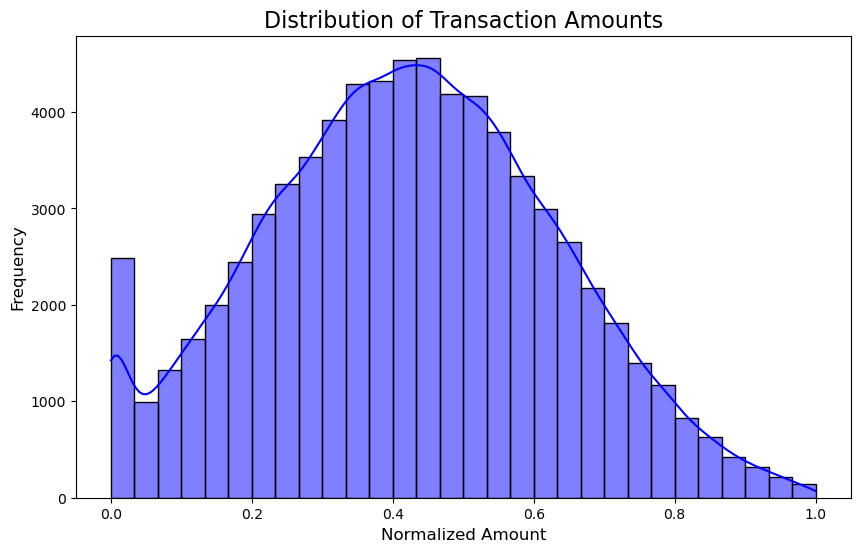

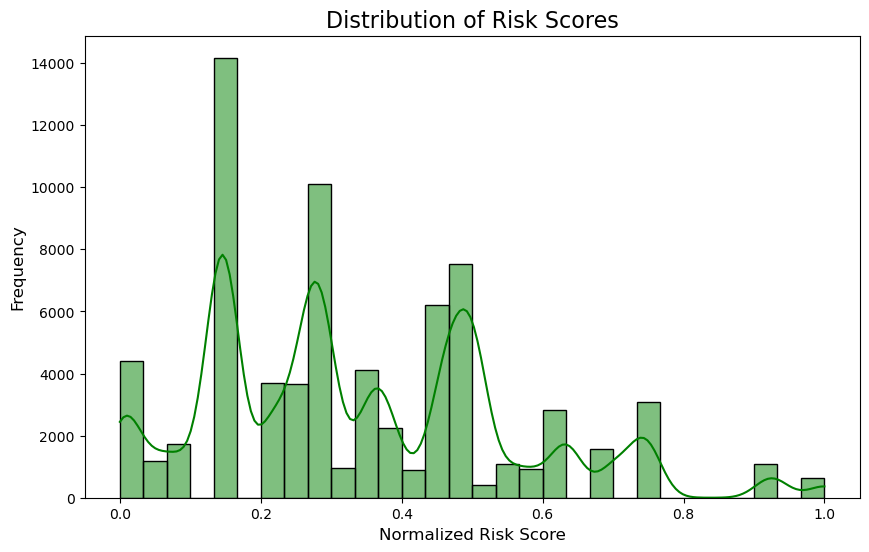

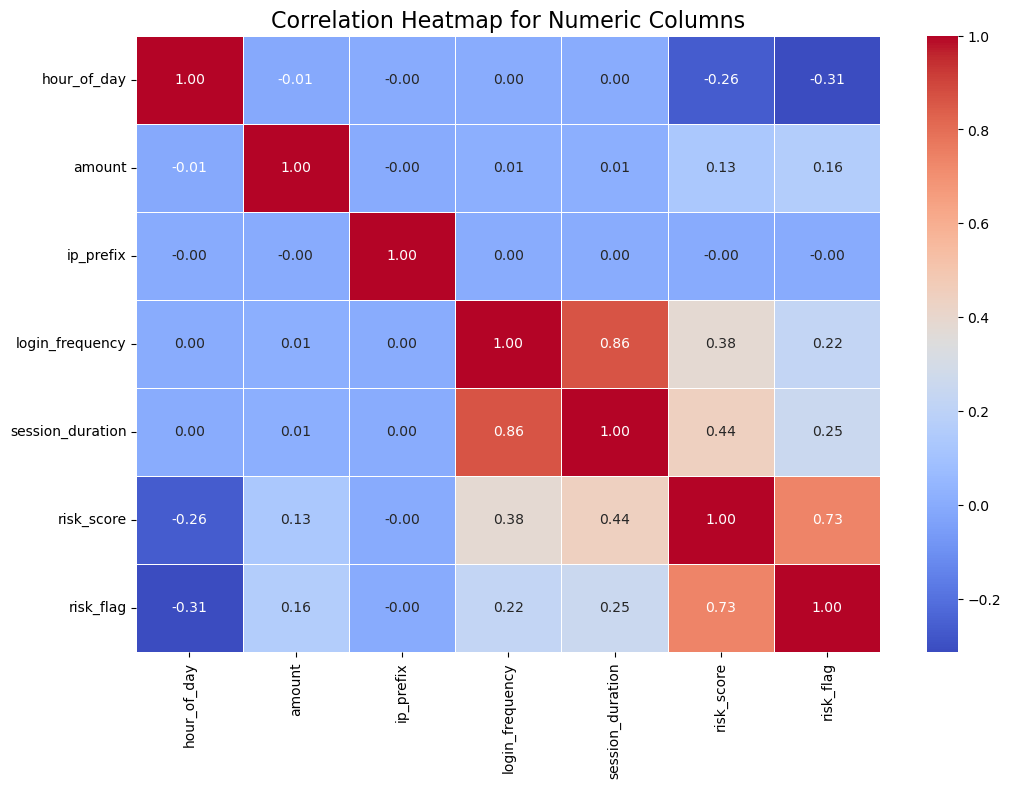

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Exploratory Data Analysis (EDA)
# Visualization: Distribution of transaction amounts
df=pd.read_csv("~/downloads/cleaned_metaverse_transactions.csv")
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['amount'], bins=30, kde=True, color='blue')
plt.title('Distribution of Transaction Amounts', fontsize=16)
plt.xlabel('Normalized Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Visualization: Risk score distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['risk_score'], bins=30, kde=True, color='green')
plt.title('Distribution of Risk Scores', fontsize=16)
plt.xlabel('Normalized Risk Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Visualization: Transaction volume by hour of the day
if 'hour' in df.columns:
    hourly_trends = df.groupby('hour')['amount'].sum()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=hourly_trends.index, y=hourly_trends.values, palette='viridis')
    plt.title('Transaction Volume by Hour of the Day', fontsize=16)
    plt.xlabel('Hour of Day', fontsize=12)
    plt.ylabel('Total Transaction Volume (Normalized)', fontsize=12)
    plt.show()

# Visualization: Transaction volume by region
if 'location_region' in df.columns:
    regional_trends = df.groupby('location_region')['amount'].sum()
    plt.figure(figsize=(12, 8))
    sns.barplot(x=regional_trends.index, y=regional_trends.values, palette='coolwarm')
    plt.title('Transaction Volume by Region', fontsize=16)
    plt.xlabel('Region', fontsize=12)
    plt.ylabel('Total Transaction Volume (Normalized)', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

# Visualization: Correlation heatmap for numeric columns
# Re-attempting correlation heatmap with only numeric columns
try:
    # Select only numeric columns for correlation analysis
    numeric_data = df_encoded.select_dtypes(include=['float64', 'int64'])

    # Generate the correlation heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap for Numeric Columns', fontsize=16)
    plt.show()
except Exception as e:
    print(f"An error occurred while generating the heatmap: {e}")


In [16]:
# Proceeding with ML modeling for fraud detection using the 'risk_flag' column as the target variable

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Fixing the feature set by excluding non-numeric columns for ML modeling
try:
    # Ensure only numeric features are included in the model
    numeric_features = df_encoded.select_dtypes(include=['float64', 'int64']).drop(columns=['risk_flag'])

    # Target variable
    target = df_encoded['risk_flag']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(numeric_features, target, test_size=0.2, random_state=42)

    # Train the Random Forest model
    rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
    rf_model.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nAccuracy Score:")
    print(accuracy_score(y_test, y_pred))

except Exception as e:
    print(f"An error occurred during ML modeling: {e}")



Confusion Matrix:
[[12202     0]
 [    0  2293]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12202
           1       1.00      1.00      1.00      2293

    accuracy                           1.00     14495
   macro avg       1.00      1.00      1.00     14495
weighted avg       1.00      1.00      1.00     14495


Accuracy Score:
1.0


Silhouette Score for K-Means Clustering: 0.34


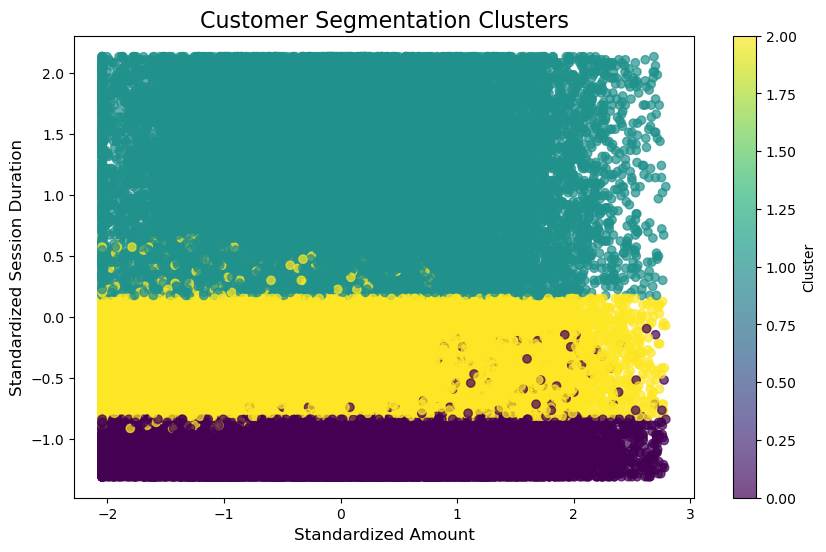

,amount,session_duration,login_frequency,risk_score,cluster
0,0.677223,0.201439,3,0.050000,2
1,0.000000,0.294964,5,0.133333,2
2,0.661288,0.388489,3,0.216667,2
3,0.255638,0.654676,8,0.290000,1
4,0.659055,0.575540,6,0.633333,1


In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Step 1: Select features for clustering
clustering_features = ['amount', 'session_duration', 'login_frequency', 'risk_score']

# Standardize the features
scaler = StandardScaler()
clustering_data = scaler.fit_transform(df_encoded[clustering_features])

# Step 2: Apply K-Means clustering
# Define the number of clusters (e.g., 3 for simplicity)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(clustering_data)

# Step 3: Evaluate clustering performance
silhouette_avg = silhouette_score(clustering_data, clusters)
print(f"Silhouette Score for K-Means Clustering: {silhouette_avg:.2f}")

# Add the cluster labels to the original dataset
df_encoded['cluster'] = clusters

# Step 4: Visualize the clusters (using the first two features for simplicity)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(clustering_data[:, 0], clustering_data[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.title('Customer Segmentation Clusters', fontsize=16)
plt.xlabel('Standardized Amount', fontsize=12)
plt.ylabel('Standardized Session Duration', fontsize=12)
plt.show()

# Preview the clustered data
df_encoded[['amount', 'session_duration', 'login_frequency', 'risk_score', 'cluster']].head()



Cluster Summary:
           amount  session_duration  login_frequency  risk_score
cluster                                                         
0        0.424068          0.071147         1.537588    0.352277
1        0.426427          0.718932         7.014431    0.525851
2        0.418469          0.287231         4.032507    0.148526


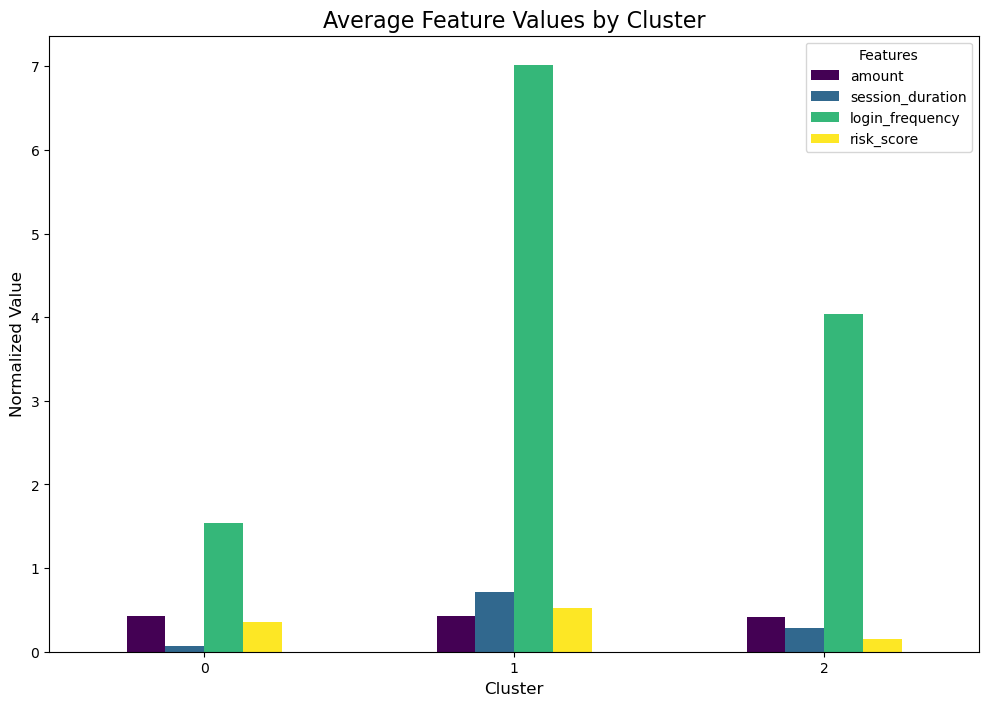

/var/folders/hf/1dlbhgx1617cvccssv4chsgc0000gn/T/ipykernel_72825/302975178.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_encoded, x='cluster', y='amount', palette='viridis')


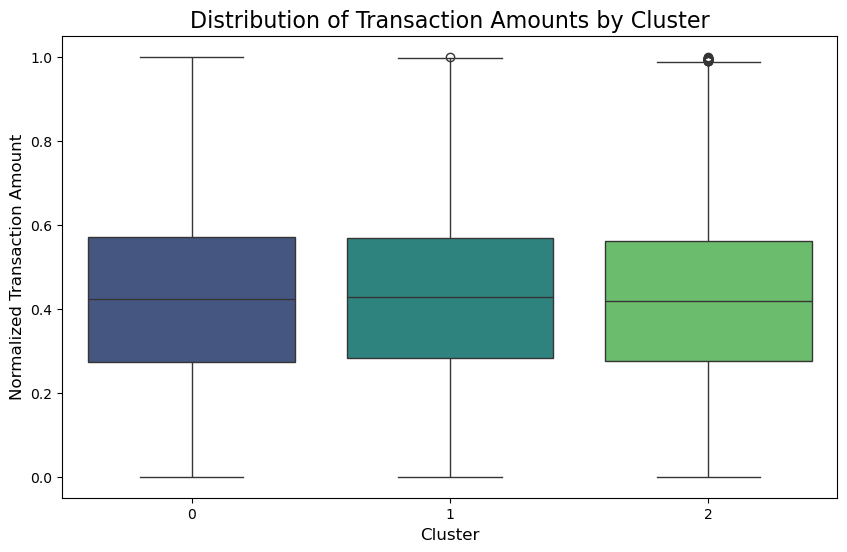

/var/folders/hf/1dlbhgx1617cvccssv4chsgc0000gn/T/ipykernel_72825/302975178.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_encoded, x='cluster', y='risk_score', palette='coolwarm')


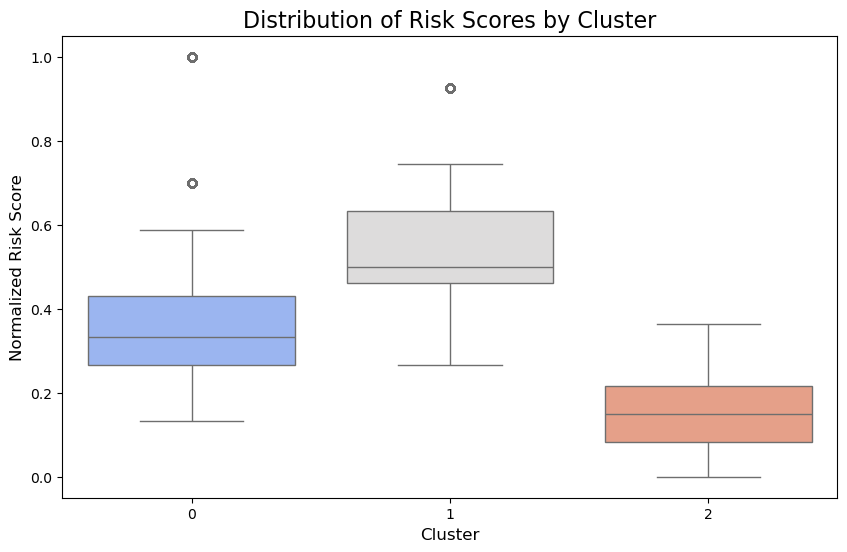

In [20]:
# Step 1: Summarize the characteristics of each cluster
cluster_summary = df_encoded.groupby('cluster')[['amount', 'session_duration', 'login_frequency', 'risk_score']].mean()
print("\nCluster Summary:")
print(cluster_summary)

# Step 2: Visualize the distribution of features across clusters
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for cluster means
cluster_summary.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title("Average Feature Values by Cluster", fontsize=16)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Normalized Value", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Features")
plt.show()

# Boxplot for 'amount' by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_encoded, x='cluster', y='amount', palette='viridis')
plt.title("Distribution of Transaction Amounts by Cluster", fontsize=16)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Normalized Transaction Amount", fontsize=12)
plt.show()

# Boxplot for 'risk_score' by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_encoded, x='cluster', y='risk_score', palette='coolwarm')
plt.title("Distribution of Risk Scores by Cluster", fontsize=16)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Normalized Risk Score", fontsize=12)
plt.show()


In [28]:

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Set up Streamlit app configurations
st.set_page_config(page_title="Customer Segmentation and Insights", layout="wide")
st.title("Customer Segmentation and Insights Dashboard")

# Provide the file path directly in the script
file_path = "~/downloads/cleaned_metaverse_transactions.csv"

@st.cache_data
def load_data():
    """Load dataset from the specified file path."""
    return pd.read_csv(file_path)

try:
    # Load the data
    df = load_data()

    # Sidebar Options
    st.sidebar.title("Options")
    show_overview = st.sidebar.checkbox("Show Dataset Overview")
    show_cleaning = st.sidebar.checkbox("Show Data Cleaning")
    show_visualizations = st.sidebar.checkbox("Show Visualizations")
    show_ml_model = st.sidebar.checkbox("Machine Learning Model")
    show_insights = st.sidebar.checkbox("Show Insights")

    # Dataset Overview
    if show_overview:
        st.subheader("Dataset Overview")
        st.write(df.head())
        st.write("Basic Statistics:")
        st.write(df.describe())

    # Data Cleaning
    if show_cleaning:
        st.subheader("Data Cleaning")
        # Drop duplicates
        df_cleaned = df.drop_duplicates()
        # Handle missing values (fill with median as an example)
        df_cleaned.fillna(df_cleaned.median(numeric_only=True), inplace=True)
        st.write("Cleaned Dataset:")
        st.write(df_cleaned.head())

    # Visualizations
    if show_visualizations:
        st.subheader("Visualizations")

        # Distribution of Transaction Amounts
        st.write("Distribution of Transaction Amounts")
        fig1, ax1 = plt.subplots()
        sns.histplot(df['amount'], bins=30, kde=True, color='blue', ax=ax1)
        ax1.set_title("Distribution of Transaction Amounts")
        st.pyplot(fig1)

        # Risk Scores by Cluster
        if "cluster" in df.columns:
            st.write("Risk Scores by Cluster")
            fig2, ax2 = plt.subplots()
            sns.boxplot(data=df, x='cluster', y='risk_score', hue='cluster', palette='coolwarm', ax=ax2)
            ax2.set_title("Risk Scores by Cluster")
            st.pyplot(fig2)

        # Scatterplot for Clusters
        if "cluster" in df.columns:
            st.write("Scatterplot of Customer Clusters")
            fig3, ax3 = plt.subplots()
            sns.scatterplot(x=df['amount'], y=df['session_duration'], hue=df['cluster'], palette='viridis', ax=ax3)
            ax3.set_title("Scatterplot of Customer Clusters")
            st.pyplot(fig3)

    # Machine Learning Model
    if show_ml_model:
        st.subheader("Machine Learning Model: Fraud Prediction")
        if "risk_flag" in df.columns:
            # Prepare data for the model
            features = df.drop(columns=['risk_flag'])
            target = df['risk_flag']

            # Split data into train and test sets
            X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

            # Train Random Forest model
            model = RandomForestClassifier(random_state=42, n_estimators=100)
            model.fit(X_train, y_train)

            # Make predictions
            y_pred = model.predict(X_test)

            # Display evaluation metrics
            st.write("Confusion Matrix:")
            st.write(confusion_matrix(y_test, y_pred))

            st.write("Classification Report:")
            st.text(classification_report(y_test, y_pred))

    # Insights
    if show_insights:
        st.subheader("Insights and Recommendations")
        for cluster, row in df.groupby('cluster')[['amount', 'session_duration', 'login_frequency', 'risk_score']].mean().iterrows():
            st.write(f"**Cluster {cluster}**")
            st.write(f"- Average Transaction Amount: {row['amount']:.2f}")
            st.write(f"- Average Session Duration: {row['session_duration']:.2f}")
            st.write(f"- Average Login Frequency: {row['login_frequency']:.2f}")
            st.write(f"- Average Risk Score: {row['risk_score']:.2f}")

            if row['risk_score'] > 0.5:
                st.warning("High risk score observed, monitor transactions closely.")
            if row['amount'] > 0.6:
                st.info("High transaction amounts, potential upselling opportunity.")
            if row['login_frequency'] < 3:
                st.info("Low login frequency, consider engagement strategies.")

except FileNotFoundError:
    st.error(f"The file `{file_path}` could not be found. Please check the file path and try again.")
except Exception as e:
    st.error(f"An error occurred: {e}")


2024-11-30 16:59:54.629 No runtime found, using MemoryCacheStorageManager
2024-11-30 16:59:54.635 No runtime found, using MemoryCacheStorageManager
